# step 0 패키지 불러오기

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

%matplotlib inline

# step 1 데이터 구성하기

In [71]:
df = pd.read_csv("DIABETES.csv", engine='python')
gender1 = df['GENDER']([df['GENDER']=1)
# df.loc[df['GENDER']==1, 'GENDER1'] = 1
# df.loc[df['GENDER']==2, 'GENDER2'] = 2
# df['GENDER1'].fillna(0, inplace=True)
# df['GENDER2'].fillna(0, inplace=True)
# df
# df['GENDER1'] = df[df['GENDER']==1]
# df['GENDER2'] = df[df['GENDER']==2]

SyntaxError: invalid syntax (<ipython-input-71-17fbd0577b1b>, line 2)

# step 2 변수간의 경향성 파악 - 그래프 분석

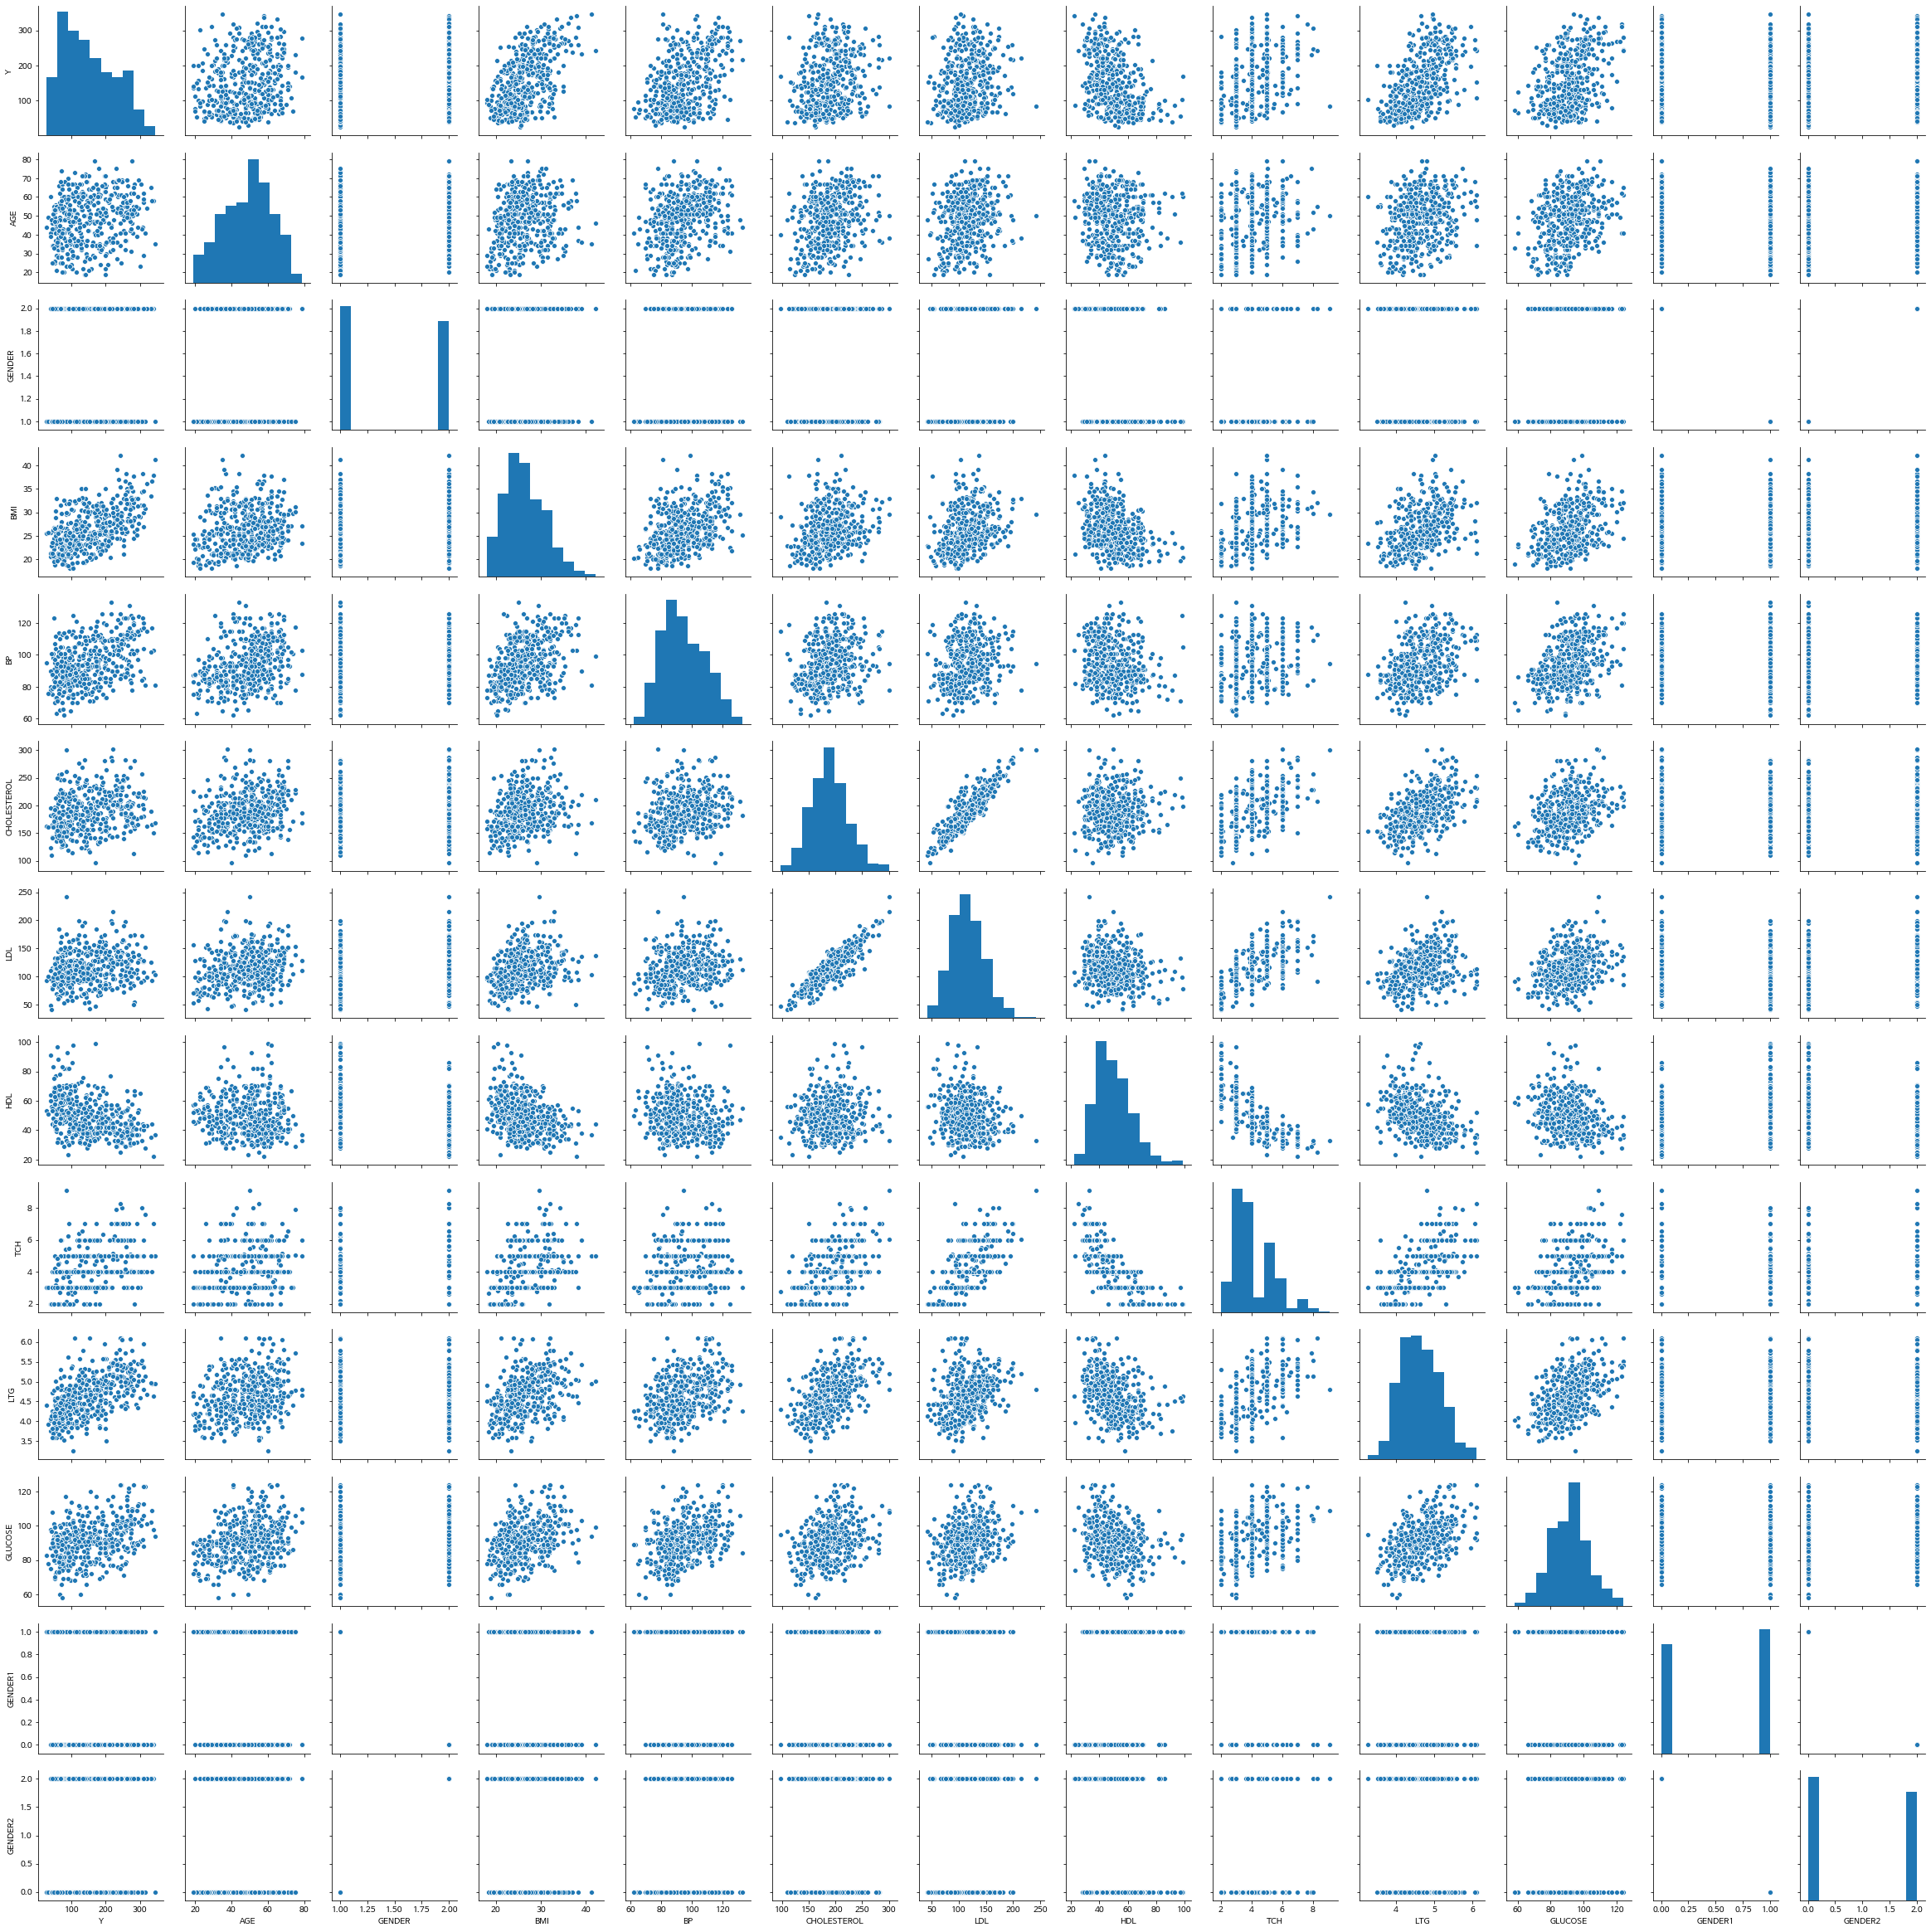

In [65]:
sns.pairplot(df)

In [66]:
df.corr().round(3)


,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE,GENDER1,GENDER2
Y,1.000,0.188,0.043,0.586,0.441,0.212,0.174,-0.395,0.430,0.566,0.382,-0.043,0.043
AGE,0.188,1.000,0.174,0.185,0.335,0.260,0.219,-0.075,0.204,0.271,0.302,-0.174,0.174
GENDER,0.043,0.174,1.000,0.088,0.241,0.035,0.143,-0.379,0.332,0.150,0.208,-1.000,1.000
BMI,0.586,0.185,0.088,1.000,0.395,0.250,0.261,-0.367,0.414,0.446,0.389,-0.088,0.088
BP,0.441,0.335,0.241,0.395,1.000,0.242,0.186,-0.179,0.258,0.393,0.390,-0.241,0.241
CHOLESTEROL,0.212,0.260,0.035,0.250,0.242,1.000,0.897,0.052,0.542,0.516,0.326,-0.035,0.035
LDL,0.174,0.219,0.143,0.261,0.186,0.897,1.000,-0.196,0.660,0.318,0.291,-0.143,0.143
HDL,-0.395,-0.075,-0.379,-0.367,-0.179,0.052,-0.196,1.000,-0.738,-0.399,-0.274,0.379,-0.379
TCH,0.430,0.204,0.332,0.414,0.258,0.542,0.660,-0.738,1.000,0.618,0.417,-0.332,0.332
LTG,0.566,0.271,0.150,0.446,0.393,0.516,0.318,-0.399,0.618,1.000,0.465,-0.150,0.150


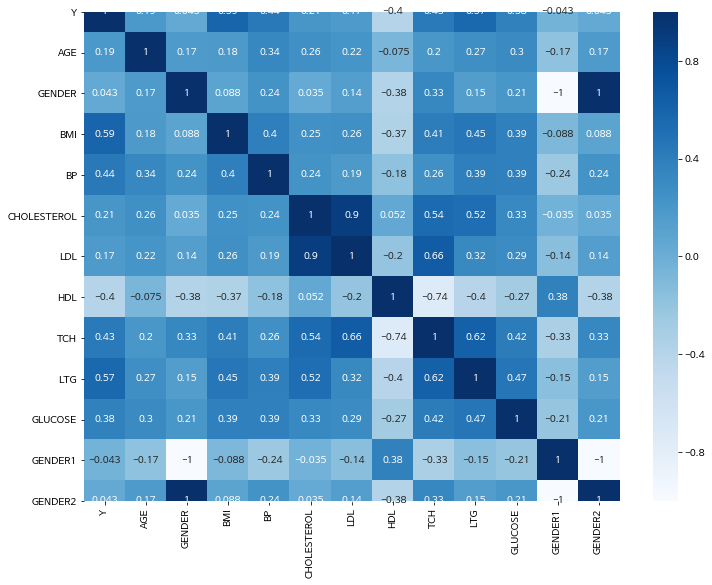

In [67]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr().round(3), annot=True, cmap='Blues')


# step 3 회귀모델생성: 설명변수 전체

In [69]:
model1 =smf.ols(formula='Y~AGE + GENDER2 + BMI + BP + CHOLESTEROL + LDL + HDL + TCH + LTG + GLUCOSE', data = df)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           3.83e-62
Time:                        17:15:30   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -357.4268     67.058     -5.330      

# 회귀 모델 생성: 설명변수 간의 다중공선성 확인

In [54]:
df_x = df.drop("Y", axis=1)
df_x_const = add_constant(df_x)
df_vif = pd.DataFrame()
df_vif['variable'] = df_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_x_const.values, i) for i in range(df_x_const.shape[1])]
df_vif.sort_values('VIF', inplace=True)
df_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variable,VIF
0,const,0.000
1,AGE,1.217
4,BP,1.459
10,GLUCOSE,1.485
3,BMI,1.509
8,TCH,8.891
9,LTG,10.076
7,HDL,15.402
6,LDL,39.193
5,CHOLESTEROL,59.203


# 회귀모델생성 : 설명변수 다중공선성 처리
## CHOLESTEROL제외

In [16]:
model =smf.ols(formula='Y~AGE + GENDER + BMI + BP + CHOLESTEROL + HDL + TCH + LTG + \
                        GLUCOSE', data = df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     51.08
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           1.37e-62
Time:                        16:57:40   Log-Likelihood:                -2387.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     432   BIC:                             4835.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -261.3832     42.961     -6.084      

In [20]:
df_x = df.drop(["Y", "LDL"], axis=1)
df_x_const = add_constant(df_x)
df_vif = pd.DataFrame()
df_vif['variable'] = df_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_x_const.values, i) for i in range(df_x_const.shape[1])]
df_vif.sort_values('VIF', inplace=True)
df_vif.round(3)



,variable,VIF
1,AGE,1.215
2,GENDER,1.276
4,BP,1.459
9,GLUCOSE,1.484
3,BMI,1.496
8,LTG,2.092
5,CHOLESTEROL,4.421
6,HDL,6.563
7,TCH,8.726
0,const,277.544


# step 4 후진제거법을 이용한 변수 선택